### DYNAMIC PRICING FOR URBAN PARKING LOTS

In [6]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [7]:
df.head(), df.tail(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


(   ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
 0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
 1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
 2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
 3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
 4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   
 
   TrafficConditionNearby  QueueLength  IsSpecialDay LastUpdatedDate  \
 0                    low            1             0      04-10-2016   
 1                    low            1             0      04-10-2016   
 2                    low            2             0      04-10-2016   
 3                    low            2             0      04-10-2016   
 4                    low            2             0      04-10-2016   
 
   LastUpdatedTime  
 0        07:59:00  
 1        08:25:00  
 2       

In [8]:
df.isnull(), df.isnull().sum()

(          ID  SystemCodeNumber  Capacity  Latitude  Longitude  Occupancy  \
 0      False             False     False     False      False      False   
 1      False             False     False     False      False      False   
 2      False             False     False     False      False      False   
 3      False             False     False     False      False      False   
 4      False             False     False     False      False      False   
 ...      ...               ...       ...       ...        ...        ...   
 18363  False             False     False     False      False      False   
 18364  False             False     False     False      False      False   
 18365  False             False     False     False      False      False   
 18366  False             False     False     False      False      False   
 18367  False             False     False     False      False      False   
 
        VehicleType  TrafficConditionNearby  QueueLength  IsSpecialDay  \


In [9]:
df.duplicated(), df.duplicated().sum()

(0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 18363    False
 18364    False
 18365    False
 18366    False
 18367    False
 Length: 18368, dtype: bool,
 np.int64(0))

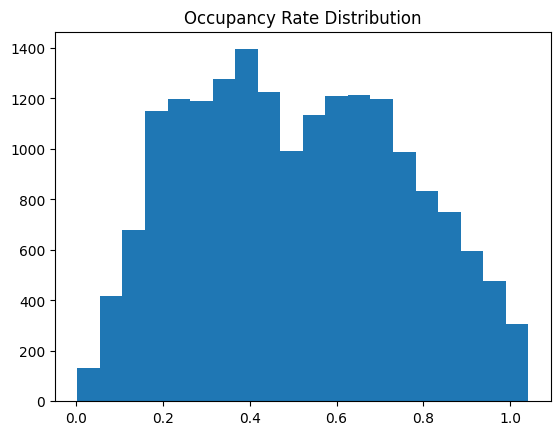

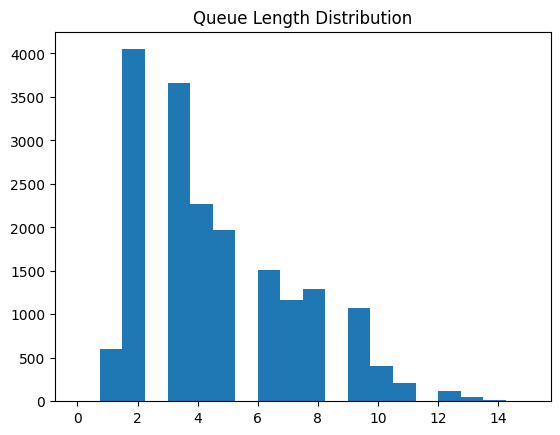

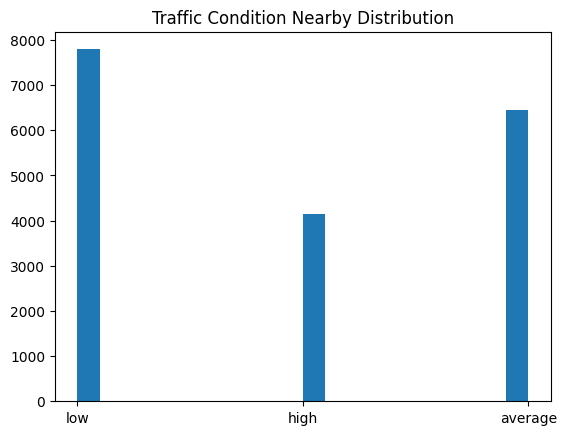

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('dataset.csv')

# Standardize column names
df.columns = df.columns.str.lower()

# Create timestamp if missing
if 'timestamp' not in df.columns:
    time_points = pd.date_range(start='2025-01-01 08:00:00', periods=18, freq='30min')
    repeated = (df.shape[0] // len(time_points)) + 1
    timestamps = list(time_points) * repeated
    df['timestamp'] = timestamps[:df.shape[0]]

# Clean & EDA Visuals
plt.hist(df['occupancy'] / df['capacity'], bins=20)
plt.title('Occupancy Rate Distribution')
plt.show()

plt.hist(df['queuelength'].fillna(0), bins=20)
plt.title('Queue Length Distribution')
plt.show()

plt.hist(df['trafficconditionnearby'].fillna(0), bins=20)
plt.title('Traffic Condition Nearby Distribution')
plt.show()

# Baseline Pricing
BASE_PRICE = 10
ALPHA = 2.0
MIN_PRICE, MAX_PRICE = 5.0, 20.0

df = df.sort_values(['systemcodenumber', 'timestamp'])
last_prices = {}
df['baseline_price'] = np.nan

for idx, row in df.iterrows():
    lot = row['systemcodenumber']
    occ_rate = row['occupancy'] / row['capacity'] if row['capacity'] > 0 else 0
    prev_price = last_prices.get(lot, BASE_PRICE)
    new_price = prev_price + ALPHA * occ_rate
    df.at[idx, 'baseline_price'] = np.clip(new_price, MIN_PRICE, MAX_PRICE)
    last_prices[lot] = new_price

# Demand-Based Pricing
a1, a2, a3, a4, a5 = 2.0, 0.5, 1.0, 1.5, 1.0
LAMBDA = 0.8
vehicle_weights = {'car': 1.0, 'bike': 0.5, 'truck': 1.5}

df['vehicle_weight'] = df['vehicletype'].astype(str).map(vehicle_weights).fillna(1.0)
df['queuelength'] = pd.to_numeric(df['queuelength'], errors='coerce').fillna(0)
df['trafficconditionnearby'] = pd.to_numeric(df['trafficconditionnearby'], errors='coerce').fillna(0)
df['isspecialday'] = pd.to_numeric(df['isspecialday'], errors='coerce').fillna(0)
df['occupancy'] = pd.to_numeric(df['occupancy'], errors='coerce').fillna(0)
df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce').replace(0, np.nan)
df['occupancy_rate'] = (df['occupancy'] / df['capacity']).fillna(0)

df['raw_demand'] = (
    a1 * df['occupancy_rate'] +
    a2 * df['queuelength'] -
    a3 * df['trafficconditionnearby'] +
    a4 * df['isspecialday'] +
    a5 * df['vehicle_weight']
)

df['norm_demand'] = (df['raw_demand'] - df['raw_demand'].min()) / (df['raw_demand'].max() - df['raw_demand'].min())
df['demand_price'] = BASE_PRICE * (1 + LAMBDA * df['norm_demand'])
df['demand_price'] = df['demand_price'].clip(MIN_PRICE, MAX_PRICE)

# Competitive Pricing
from math import radians, sin, cos, sqrt, asin

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    dlat, dlon = radians(lat2 - lat1), radians(lon2 - lon1)
    lat1, lat2 = radians(lat1), radians(lat2)
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2 * R * asin(sqrt(a))

DIST_THRESHOLD = 0.5
prices, reroutes = [], []

lot_coords = df.groupby('systemcodenumber')[['latitude', 'longitude']].first().to_dict('index')
df = df.sort_values(['timestamp', 'systemcodenumber'])

for t, group in df.groupby('timestamp'):
    group = group.copy()
    lot_prices = {}
    for idx, row in group.iterrows():
        occ_rate = row['occupancy'] / row['capacity'] if row['capacity'] > 0 else 0
        demand = (
            a1 * occ_rate +
            a2 * row['queuelength'] -
            a3 * row['trafficconditionnearby'] +
            a4 * row['isspecialday'] +
            a5 * row['vehicle_weight']
        )
        group.at[idx, 'demand'] = demand

    dmin, dmax = group['demand'].min(), group['demand'].max()
    group['norm_demand'] = (group['demand'] - dmin) / (dmax - dmin + 1e-8)

    for idx, row in group.iterrows():
        price = BASE_PRICE * (1 + LAMBDA * row['norm_demand'])
        lot_prices[row['systemcodenumber']] = np.clip(price, MIN_PRICE, MAX_PRICE)

    for idx, row in group.iterrows():
        lot = row['systemcodenumber']
        if lot not in lot_coords:
            continue
        lat1, lon1 = lot_coords[lot]['latitude'], lot_coords[lot]['longitude']
        my_price = lot_prices.get(lot, BASE_PRICE)
        my_occ, my_cap = row['occupancy'], row['capacity']
        reroute = False

        competitors = [
            lot_prices[other]
            for other, loc in lot_coords.items()
            if other != lot and other in lot_prices and
               haversine(lat1, lon1, loc['latitude'], loc['longitude']) <= DIST_THRESHOLD
        ]

        if competitors:
            avg_comp = np.mean(competitors)
            if my_occ >= my_cap and my_price > avg_comp:
                my_price = avg_comp
                reroute = True
            elif my_price < avg_comp:
                my_price += 0.5

        prices.append(np.clip(my_price, MIN_PRICE, MAX_PRICE))
        reroutes.append(reroute)

df['competitive_price'] = prices
df['reroute'] = reroutes

# Bokeh Plot
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import layout

output_notebook()

lot_id = df['systemcodenumber'].unique()[0]
df_lot = df[df['systemcodenumber'] == lot_id].sort_values('timestamp')

source = ColumnDataSource(data={
    'timestamp': df_lot['timestamp'],
    'price': df_lot['competitive_price']
})

p = figure(x_axis_type='datetime', width=800, height=300,
           title=f"Competitive Pricing - Lot {lot_id}",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

p.line(x='timestamp', y='price', source=source, line_width=2)
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Price ($)'
p.select_one(HoverTool).tooltips = [
    ("Time", "@timestamp{%F %T}"),
    ("Price", "@price{$0.00}")
]
p.select_one(HoverTool).formatters = {'@timestamp': 'datetime'}
show(layout([[p]]))

Plot for all the system code numbers

In [2]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column

output_notebook()
plots = []
# Loop through all systemcodenumbers
for lot_id in df['systemcodenumber'].unique():
    df_lot = df[df['systemcodenumber'] == lot_id].sort_values('timestamp')

    source = ColumnDataSource(data={
        'timestamp': df_lot['timestamp'],
        'price': df_lot['competitive_price']
    })

    p = figure(x_axis_type='datetime', width=800, height=250,
               title=f"Competitive Pricing - Lot {lot_id}",
               tools="pan,wheel_zoom,box_zoom,reset,hover,save")

    p.line(x='timestamp', y='price', source=source, line_width=2)
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Price ($)'
    p.select_one(HoverTool).tooltips = [
        ("Time", "@timestamp{%F %T}"),
        ("Price", "@price{$0.00}")
    ]
    p.select_one(HoverTool).formatters = {'@timestamp': 'datetime'}
    plots.append(p)

show(column(*plots))

Code for all the models

In [3]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, asin
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("dataset.csv")
df.columns = df.columns.str.lower()

# Ensure timestamp exists
if 'timestamp' not in df.columns:
    time_points = pd.date_range(start='2025-01-01 08:00:00', periods=18, freq='30min')
    repeated = (df.shape[0] // len(time_points)) + 1
    timestamps = list(time_points) * repeated
    df['timestamp'] = timestamps[:df.shape[0]]

# Define constants
BASE_PRICE = 10
ALPHA = 2.0
MIN_PRICE, MAX_PRICE = 5.0, 20.0
a1, a2, a3, a4, a5 = 2.0, 0.5, 1.0, 1.5, 1.0
LAMBDA = 0.8
DIST_THRESHOLD = 0.5
vehicle_weights = {'car': 1.0, 'bike': 0.5, 'truck': 1.5}

# Clean & calculate occupancy rate
df['vehicle_weight'] = df['vehicletype'].astype(str).map(vehicle_weights).fillna(1.0)
df['queuelength'] = pd.to_numeric(df['queuelength'], errors='coerce').fillna(0)
df['trafficconditionnearby'] = pd.to_numeric(df['trafficconditionnearby'], errors='coerce').fillna(0)
df['isspecialday'] = pd.to_numeric(df['isspecialday'], errors='coerce').fillna(0)
df['occupancy'] = pd.to_numeric(df['occupancy'], errors='coerce').fillna(0)
df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce').replace(0, np.nan)
df['occupancy_rate'] = (df['occupancy'] / df['capacity']).fillna(0)

# Model 1: Baseline Linear Pricing
df = df.sort_values(['systemcodenumber', 'timestamp'])
last_prices = {}
df['baseline_price'] = np.nan
for idx, row in df.iterrows():
    lot = row['systemcodenumber']
    occ_rate = row['occupancy_rate']
    prev_price = last_prices.get(lot, BASE_PRICE)
    new_price = prev_price + ALPHA * occ_rate
    df.at[idx, 'baseline_price'] = np.clip(new_price, MIN_PRICE, MAX_PRICE)
    last_prices[lot] = new_price

# Model 2: Demand-Based Pricing
df['raw_demand'] = (
    a1 * df['occupancy_rate'] +
    a2 * df['queuelength'] -
    a3 * df['trafficconditionnearby'] +
    a4 * df['isspecialday'] +
    a5 * df['vehicle_weight']
)
df['norm_demand'] = (df['raw_demand'] - df['raw_demand'].min()) / (df['raw_demand'].max() - df['raw_demand'].min())
df['demand_price'] = BASE_PRICE * (1 + LAMBDA * df['norm_demand'])
df['demand_price'] = df['demand_price'].clip(MIN_PRICE, MAX_PRICE)

# Model 3: Competitive Pricing
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    dlat, dlon = radians(lat2 - lat1), radians(lon2 - lon1)
    lat1, lat2 = radians(lat1), radians(lat2)
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2 * R * asin(sqrt(a))

lot_coords = df.groupby('systemcodenumber')[['latitude', 'longitude']].first().to_dict('index')
prices, reroutes = [], []

df = df.sort_values(['timestamp', 'systemcodenumber'])

for t, group in df.groupby('timestamp'):
    group = group.copy()
    lot_prices = {}
    for idx, row in group.iterrows():
        occ_rate = row['occupancy_rate']
        demand = (
            a1 * occ_rate +
            a2 * row['queuelength'] -
            a3 * row['trafficconditionnearby'] +
            a4 * row['isspecialday'] +
            a5 * row['vehicle_weight']
        )
        group.at[idx, 'demand'] = demand

    dmin, dmax = group['demand'].min(), group['demand'].max()
    group['norm_demand'] = (group['demand'] - dmin) / (dmax - dmin + 1e-8)

    for idx, row in group.iterrows():
        price = BASE_PRICE * (1 + LAMBDA * row['norm_demand'])
        lot_prices[row['systemcodenumber']] = np.clip(price, MIN_PRICE, MAX_PRICE)

    for idx, row in group.iterrows():
        lot = row['systemcodenumber']
        if lot not in lot_coords:
            continue
        lat1, lon1 = lot_coords[lot]['latitude'], lot_coords[lot]['longitude']
        my_price = lot_prices.get(lot, BASE_PRICE)
        my_occ, my_cap = row['occupancy'], row['capacity']
        reroute = False
        competitors = [
            lot_prices[other]
            for other, loc in lot_coords.items()
            if other != lot and other in lot_prices and
               haversine(lat1, lon1, loc['latitude'], loc['longitude']) <= DIST_THRESHOLD
        ]
        if competitors:
            avg_comp = np.mean(competitors)
            if my_occ >= my_cap and my_price > avg_comp:
                my_price = avg_comp
                reroute = True
            elif my_price < avg_comp:
                my_price += 0.5
        prices.append(np.clip(my_price, MIN_PRICE, MAX_PRICE))
        reroutes.append(reroute)

df['competitive_price'] = prices
df['reroute'] = reroutes

# Save output
df.to_csv("pricing_output.csv", index=False)
print("Pricing complete. Output saved to 'pricing_output.csv'.")

Pricing complete. Output saved to 'pricing_output.csv'.


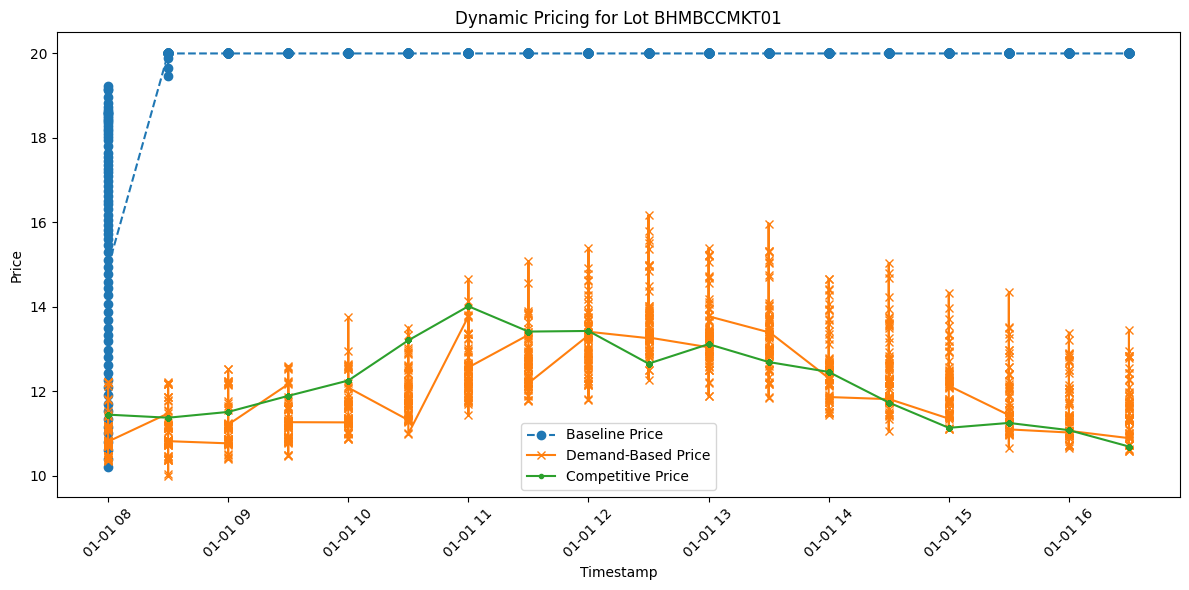

'pricing_plot_lot_example.png'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output from the previous dynamic pricing script
df = pd.read_csv("pricing_output.csv")

# Ensure timestamp is parsed
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Pick one lot to visualize
example_lot = df['systemcodenumber'].unique()[0]
df_lot = df[df['systemcodenumber'] == example_lot].sort_values('timestamp')

# Plot all three models
plt.figure(figsize=(12, 6))
plt.plot(df_lot['timestamp'], df_lot['baseline_price'], label='Baseline Price', linestyle='--', marker='o')
plt.plot(df_lot['timestamp'], df_lot['demand_price'], label='Demand-Based Price', linestyle='-', marker='x')
plt.plot(df_lot['timestamp'], df_lot['competitive_price'], label='Competitive Price', linestyle='-', marker='.')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title(f'Dynamic Pricing for Lot {example_lot}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plot_path = "pricing_plot_lot_example.png"
plt.show()
plot_path

Plot for all the system code numbers

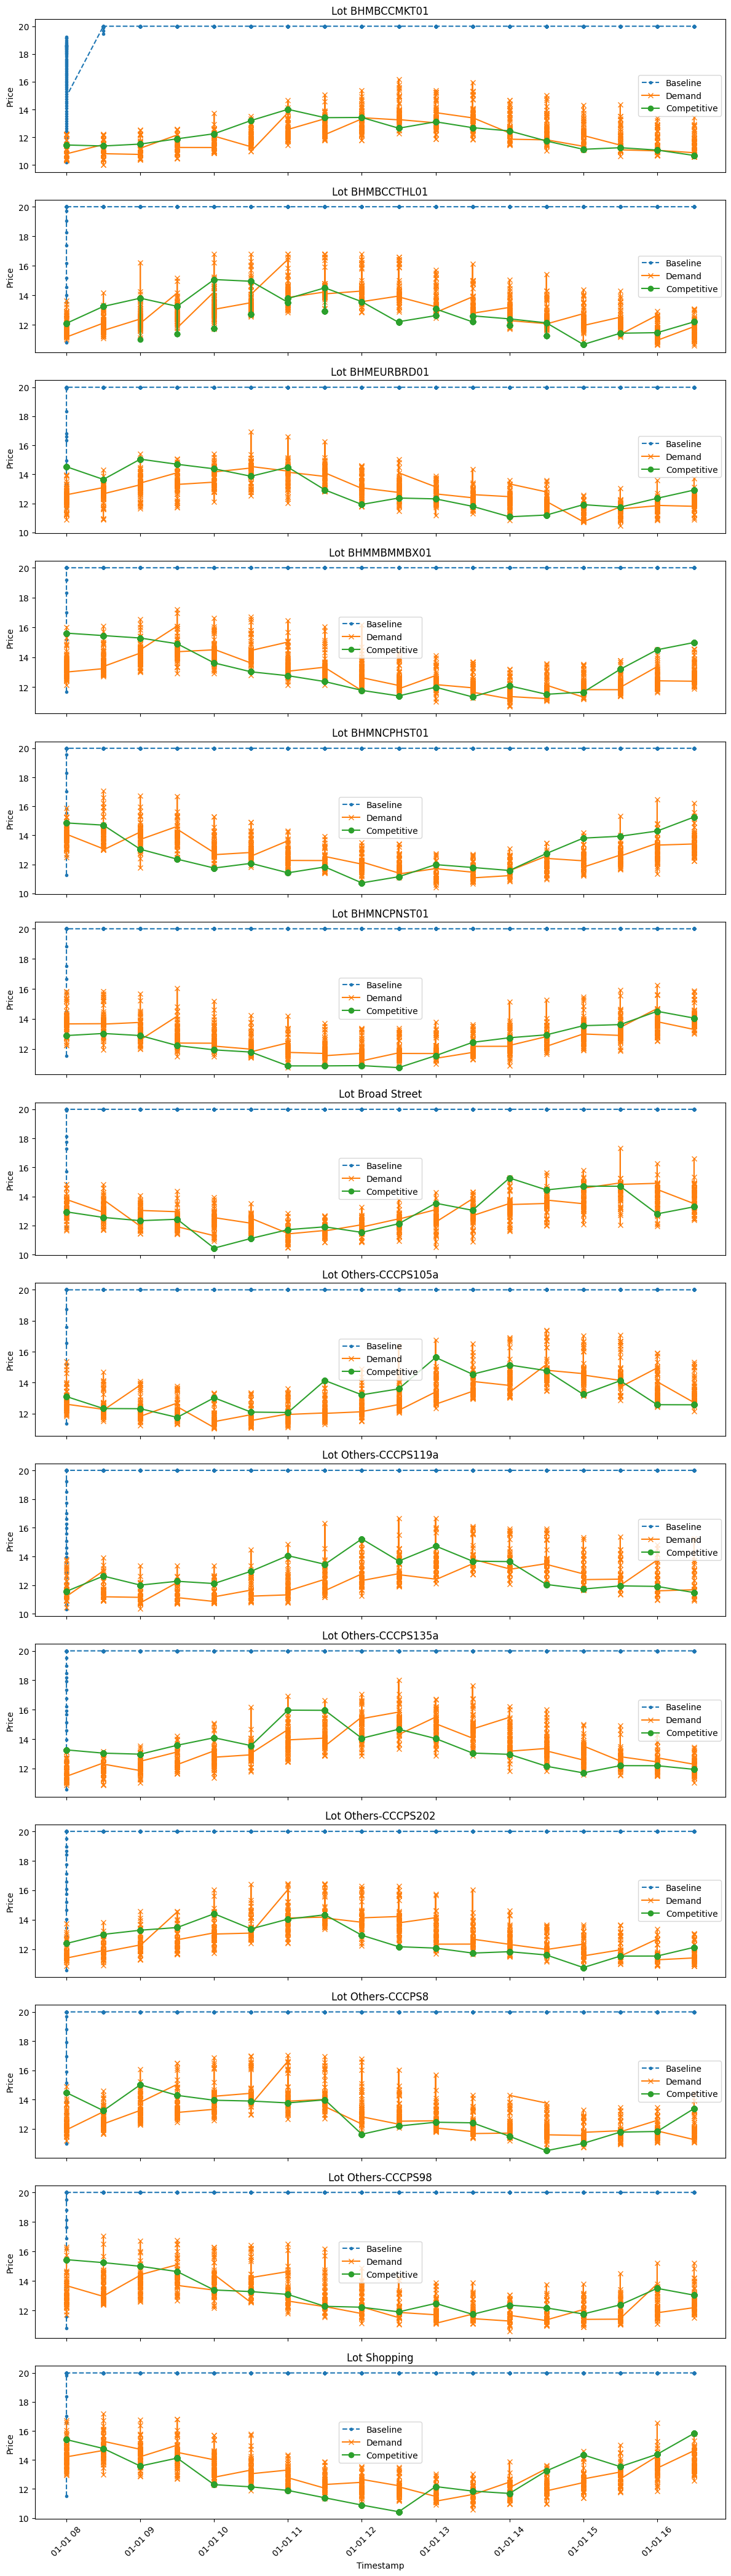

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load pricing output
df = pd.read_csv("pricing_output.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Get all unique parking lots
lots = df['systemcodenumber'].unique()
n_lots = len(lots)

# Set up figure
fig, axes = plt.subplots(n_lots, 1, figsize=(12, n_lots * 3), sharex=True)

if n_lots == 1:
    axes = [axes]  # ensure it's iterable if only one lot

for i, lot in enumerate(lots):
    df_lot = df[df['systemcodenumber'] == lot].sort_values('timestamp')
    ax = axes[i]
    ax.plot(df_lot['timestamp'], df_lot['baseline_price'], label='Baseline', linestyle='--', marker='.')
    ax.plot(df_lot['timestamp'], df_lot['demand_price'], label='Demand', linestyle='-', marker='x')
    ax.plot(df_lot['timestamp'], df_lot['competitive_price'], label='Competitive', linestyle='-', marker='o')
    ax.set_title(f"Lot {lot}")
    ax.set_ylabel("Price")
    ax.legend()

axes[-1].set_xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()